# Charpter 3

## Problem 8

In [212]:
import pandas as pd
import numpy as np 
from pandas.plotting import scatter_matrix
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, LinearRegression as lr, RidgeCV, LassoCV 
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression as PLS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error as mse
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
 
df= pd.read_csv("Auto.csv")
print(df)

      mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0    18.0          8         307.0        130    3504          12.0    70   
1    15.0          8         350.0        165    3693          11.5    70   
2    18.0          8         318.0        150    3436          11.0    70   
3    16.0          8         304.0        150    3433          12.0    70   
4    17.0          8         302.0        140    3449          10.5    70   
..    ...        ...           ...        ...     ...           ...   ...   
392  27.0          4         140.0         86    2790          15.6    82   
393  44.0          4          97.0         52    2130          24.6    82   
394  32.0          4         135.0         84    2295          11.6    82   
395  28.0          4         120.0         79    2625          18.6    82   
396  31.0          4         119.0         82    2720          19.4    82   

     origin                       name  
0         1  chevrolet chevelle ma

In [213]:
df.dtypes
df=df[df['horsepower']!='?']
col = [i for i in df.columns if i not in ['name', 'mpg', 'cylinders']]
df[col]=df[col].astype('float')

In [214]:
model=sm.regression.linear_model.OLS(np.array(df['mpg']), np.array(df["horsepower"]))
r=model.fit()
print(r.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.649
Model:                            OLS   Adj. R-squared (uncentered):              0.648
Method:                 Least Squares   F-statistic:                              723.7
Date:                Fri, 02 Oct 2020   Prob (F-statistic):                    5.67e-91
Time:                        14:15:11   Log-Likelihood:                         -1608.1
No. Observations:                 392   AIC:                                      3218.
Df Residuals:                     391   BIC:                                      3222.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

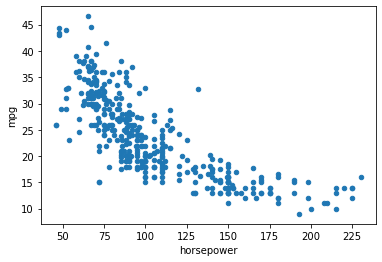

In [215]:
df.plot.scatter(x="horsepower", y="mpg")

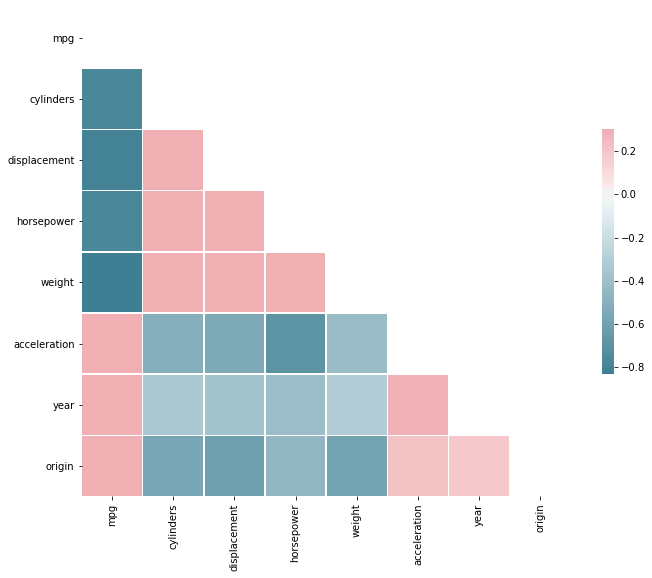

In [216]:
col=df.select_dtypes(['float', 'int', 'int64']).columns
corr = df[col].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
df=df.dropna()
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Problem 9

In [217]:
col = [i for i in df.columns if i not in ['name', 'mpg']]
print(col)
model=sm.regression.linear_model.OLS(np.array(df['mpg']), np.array(df[col]))
r=model.fit()
print(r.summary())

['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              2933.
Date:                Fri, 02 Oct 2020   Prob (F-statistic):                        0.00
Time:                        14:15:11   Log-Likelihood:                         -1030.4
No. Observations:                 392   AIC:                                      2075.
Df Residuals:                     385   BIC:                                      2103.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err

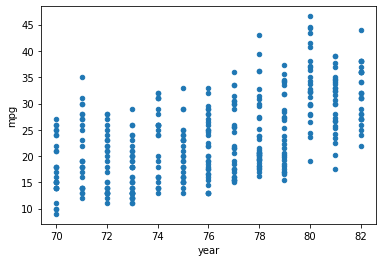

In [218]:
df.plot.scatter(x='year', y='mpg')

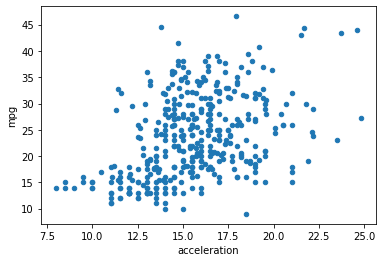

In [219]:
df.plot.scatter(x='acceleration', y='mpg')

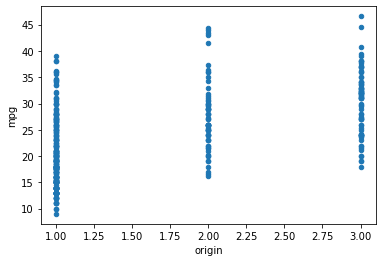

In [220]:
df.plot.scatter(x='origin', y='mpg')

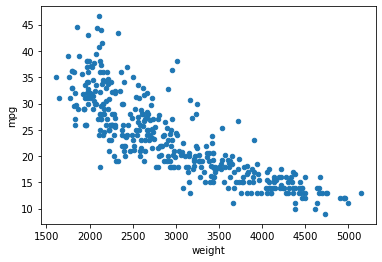

In [221]:
df.plot.scatter(x='weight', y='mpg')

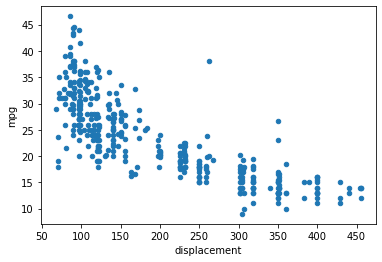

In [222]:
df.plot.scatter(x='displacement', y='mpg')

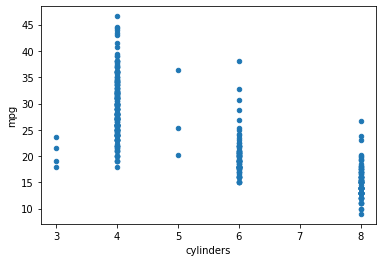

In [223]:
df.plot.scatter(x='cylinders', y='mpg')

In [224]:
col = [i for i in df.columns if i not in ['name', 'mpg', 'cylinders', 'origin']]
print(col)
model=sm.regression.linear_model.OLS(np.array(df['mpg']), np.array(df[col]))
r=model.fit()
print(r.summary())

['displacement', 'horsepower', 'weight', 'acceleration', 'year']
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              3877.
Date:                Fri, 02 Oct 2020   Prob (F-statistic):                        0.00
Time:                        14:15:12   Log-Likelihood:                         -1042.4
No. Observations:                 392   AIC:                                      2095.
Df Residuals:                     387   BIC:                                      2115.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t| 

Text(0, 0.5, 'residuals')

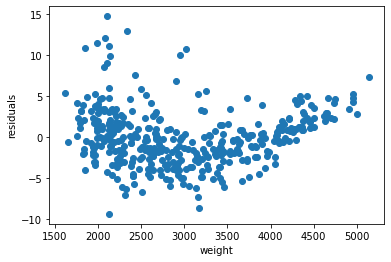

In [225]:
plt.scatter(df['weight'], r.resid)
plt.xlabel("weight")
plt.ylabel("residuals")

Text(0, 0.5, 'residuals')

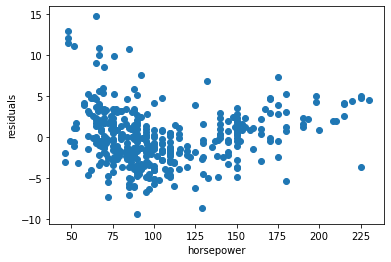

In [226]:
plt.scatter(df['horsepower'], r.resid)
plt.xlabel("horsepower")
plt.ylabel("residuals")

Text(0, 0.5, 'residuals')

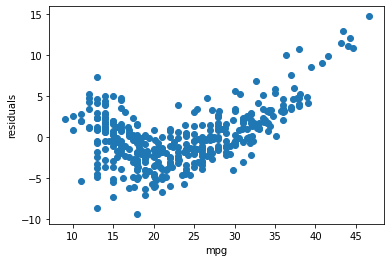

In [227]:
plt.scatter(df['mpg'], r.resid)
plt.xlabel("mpg")
plt.ylabel("residuals")

Residuals increase for large mpg. There are more residuals outliers for low horsepower and weights.

In [228]:
model=smf.ols(formula = 'mpg ~ weight+horsepower+horsepower+displacement+acceleration+year', data=df)
r=model.fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     326.5
Date:                Fri, 02 Oct 2020   Prob (F-statistic):          3.26e-136
Time:                        14:15:13   Log-Likelihood:                -1037.0
No. Observations:                 392   AIC:                             2086.
Df Residuals:                     386   BIC:                             2110.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -15.4353      4.677     -3.300      0.001     -24.631      -6.240
weight          -0.0069      0.001    -10.333      0.000      -0.008      -0.006
horsepower       0.0010      0.014      0.074      0.941      -0.026       0.028
displacement     0.0028      0.005      0.509      0.611      -0.008       0.014
acceleration     0.0903      0.102      0.886      0.376      -0.110       0.291
year             0.7541      0.053     14.334      0.000       0.651       0.858
==============================================================================
Omnibus:                       37.089   Durbin-Watson:                   1.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.937
Skew:                           0.626   Prob(JB):                     2.63e-13
Kurtosis:                       4.407   Cond. No.                     8.37e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [229]:
sm.stats.anova_lm(r)

,df,sum_sq,mean_sq,F,PR(>F)
weight,1.0,16497.759763,16497.759763,1398.057248,2.241056e-130
horsepower,1.0,327.388269,327.388269,27.743618,2.306615e-07
displacement,1.0,13.819676,13.819676,1.171110,2.798488e-01
acceleration,1.0,0.612558,0.612558,0.051910,8.198938e-01
year,1.0,2424.424288,2424.424288,205.451164,1.166530e-37
Residual,386.0,4554.988916,11.800489,NaN,NaN


In [230]:
model=smf.ols(formula = 'mpg ~ horsepower+weight*horsepower+displacement+horsepower*displacement+acceleration+acceleration*horsepower+year', data=df)
r=model.fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     301.9
Date:                Fri, 02 Oct 2020   Prob (F-statistic):          3.14e-160
Time:                        14:15:13   Log-Likelihood:                -971.41
No. Observations:                 392   AIC:                             1961.
Df Residuals:                     383   BIC:                             1997.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -2.4121      5.751     -0.419      0.675     -13.719       8.895
horsepower                 -0.1547      0.044     -3.483      0.001      -0.242      -0.067
weight                     -0.0081      0.002     -5.204      0.000      -0.011      -0.005
weight:horsepower        3.896e-05   1.09e-05      3.589      0.000    1.76e-05    6.03e-05
displacement               -0.0244      0.015     -1.674      0.095      -0.053       0.004
horsepower:displacement     0.0001      0.000      1.167      0.244   -9.34e-05       0.000
acceleration                0.2199      0.223      0.985      0.325      -0.219       0.659
acceleration:horsepower    -0.0046      0.002     -1.966      0.050      -0.009    1.22e-06
year                        0.7628      0.045     16.858      0.000       0.674       0.852
==============================================================================
Omnibus:                       41.698   Durbin-Watson:                   1.531
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.333
Skew:                           0.622   Prob(JB):                     9.78e-18
Kurtosis:                       4.803   Cond. No.                     1.58e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [231]:
model=smf.ols(formula = 'mpg ~ np.log(weight)+horsepower+np.log(displacement)+acceleration+year', data=df)
r=model.fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     402.1
Date:                Fri, 02 Oct 2020   Prob (F-statistic):          1.39e-150
Time:                        14:15:13   Log-Likelihood:                -1003.3
No. Observations:                 392   AIC:                             2019.
Df Residuals:                     386   BIC:                             2042.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              120.6677     11.014     10.956      0.000      99.013     142.322
np.log(weight)         -19.1518      2.006     -9.545      0.000     -23.097     -15.207
horsepower               0.0120      0.012      1.035      0.301      -0.011       0.035
np.log(displacement)    -1.3118      0.982     -1.335      0.183      -3.243       0.620
acceleration             0.1017      0.093      1.090      0.276      -0.082       0.285
year                     0.7779      0.048     16.071      0.000       0.683       0.873
==============================================================================
Omnibus:                       52.281   Durbin-Watson:                   1.299
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.235
Skew:                           0.715   Prob(JB):                     7.01e-25
Kurtosis:                       5.183   Cond. No.                     9.41e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Problem 11 Chapter 4

In [232]:
def model_predict(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return confusion_matrix(y_test, y_pred)
    

In [233]:
df["mpg01"] = 0
df.loc[df["mpg"]>df["mpg"].median(), ["mpg01"]] = 1

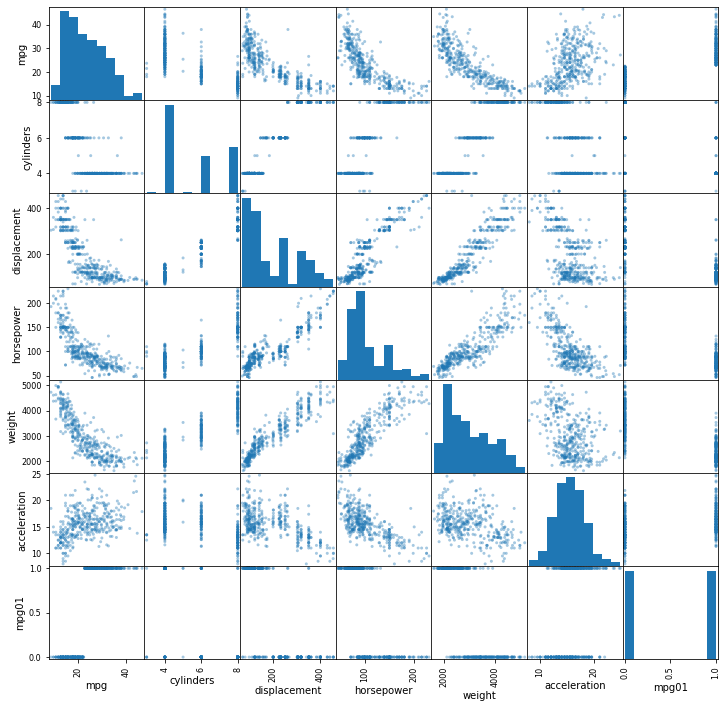

In [234]:
col=[i for i in df.columns if i not in ['year', 'origin']]
df=df[col]
axes = scatter_matrix(df, alpha=0.4, figsize=(12, 12))
#plt.tight_layout()
plt.savefig('scatter_matrix.png')

From the figures weight, horsepower, displacement, cylinders, acceleration can be also useful in predicting mpg01. I will check the best choice looking at result also.

In [235]:
X=df[['horsepower', 'weight', 'displacement', 'cylinders']]
y=df['mpg01']

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [237]:
model = LinearDiscriminantAnalysis()
model_predict(model, X_train, y_train, X_test, y_test)

array([[52, 18],
       [ 2, 58]], dtype=int64)

In [238]:
#wrong classifications
20/130

0.15384615384615385

In [239]:
model = QuadraticDiscriminantAnalysis()
model_predict(model, X_train, y_train, X_test, y_test)

array([[52, 18],
       [ 3, 57]], dtype=int64)

In [240]:
model = LogisticRegression()
model_predict(model, X_train, y_train, X_test, y_test)

array([[50, 20],
       [ 2, 58]], dtype=int64)

In [241]:
model = KNeighborsClassifier(n_neighbors=2)
model_predict(model, X_train, y_train, X_test, y_test)

array([[57, 13],
       [ 6, 54]], dtype=int64)

## Problem 9 Ch.6

In [242]:
dfc = pd.read_csv("College.csv")
print(dfc)

                         Unnamed: 0 Private   Apps  Accept  Enroll  Top10perc  \
0      Abilene Christian University     Yes   1660    1232     721         23   
1                Adelphi University     Yes   2186    1924     512         16   
2                    Adrian College     Yes   1428    1097     336         22   
3               Agnes Scott College     Yes    417     349     137         60   
4         Alaska Pacific University     Yes    193     146      55         16   
..                              ...     ...    ...     ...     ...        ...   
772         Worcester State College      No   2197    1515     543          4   
773               Xavier University     Yes   1959    1805     695         24   
774  Xavier University of Louisiana     Yes   2097    1915     695         34   
775                 Yale University     Yes  10705    2453    1317         95   
776    York College of Pennsylvania     Yes   2989    1855     691         28   

     Top25perc  F.Undergrad

In [243]:
dfc.dtypes

Unnamed: 0      object
Private         object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [244]:
le  = LabelEncoder()
dfc['Private']=le.fit_transform(dfc['Private'].astype('category'))

In [245]:
col=[i for i in dfc.columns if i not in ['Unnamed: 0', 'Apps']]
X=dfc[col]
y=dfc["Apps"]
print(X)

     Private  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0          1    1232     721         23         52         2885          537   
1          1    1924     512         16         29         2683         1227   
2          1    1097     336         22         50         1036           99   
3          1     349     137         60         89          510           63   
4          1     146      55         16         44          249          869   
..       ...     ...     ...        ...        ...          ...          ...   
772        0    1515     543          4         26         3089         2029   
773        1    1805     695         24         47         2849         1107   
774        1    1915     695         34         61         2793          166   
775        1    2453    1317         95         99         5217           83   
776        1    1855     691         28         63         2988         1726   

     Outstate  Room.Board  Books  Perso

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [247]:
model =lr()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [248]:
clf = RidgeCV(alphas=[1e-1, 1, 10, 100, 1000, 2000, 2100, 2500, 3000]).fit(X_train, y_train)
print(clf.alpha_)
y_pred=clf.predict(X_test)
print(mse(y_test, y_pred))

2000.0
1380560.2820212538


In [249]:
clf = LassoCV(alphas=[1e-6, 1e-1, 1, 10, 20, 25, 30, 35, 40, 100]).fit(X_train, y_train)
print(clf.alpha_)
y_pred=clf.predict(X_test)
print(mse(y_test, y_pred))

35.0
1378798.1633385343


1330719.7390226503
16


Text(0, 0.5, 'error')

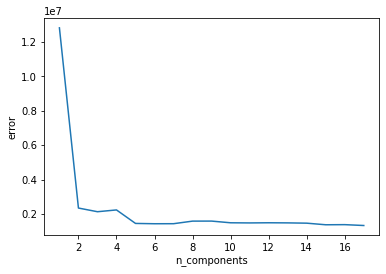

In [250]:
def pca_mse(X, y, X_test, y_test, n):
    error=[]
    for i in range(1,int(max(n))+1):
        pca = PCA(n_components=i)
        Xn_train=pca.fit_transform(X)
        Xn_test=pca.transform(X_test)
        model =lr()
        model.fit(Xn_train, y_train)
        y_pred=model.predict(Xn_test)
        error.append(mse(y_test, y_pred))
    return error
n= np.linspace(1,17, 17)
error=pca_mse(X_train, y_train, X_test, y_test, n)
print(min(error))
print(error.index(min(error)))
plt.plot(n, error)
plt.xlabel("n_components")
plt.ylabel("error")

1235525.9151444898
7


Text(0, 0.5, 'error')

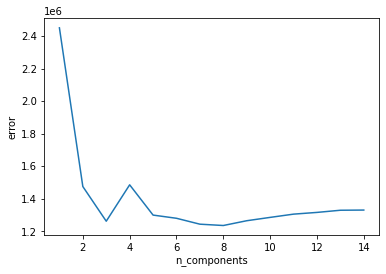

In [251]:
def pls_mse(X_train, y_train, X_test, y_test, n):
    error=[]
    for i in range(1,int(max(n))+1):
        pls = PLS(n_components=i)
        pls.fit(X_train, y_train)
        y_pred=pls.predict(X_test)
        #print(mse(y_test, y_pred))
        error.append(mse(y_test, y_pred))
    return error
n= np.linspace(1, 14, 14)
error=pls_mse(X_train, y_train, X_test, y_test, n)
print(min(error))
print(error.index(min(error)))
plt.plot(n, error)
plt.xlabel("n_components")
plt.ylabel("error")

In [252]:
pls = PLS(n_components=8)
pls.fit(X_train, y_train)
y_pred=pls.predict(X_test)
print(mse(y_test, y_pred))


1235525.9151444898


## Chapter 7

## Problem 8

Fit some of the non-linear models investigated in this chapter to the
Auto data set. Is there evidence for non-linear relationships in this
data set? Create some informative plots to justify your answer.

C:\Users\kuzn1\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


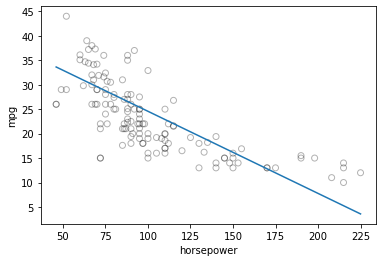

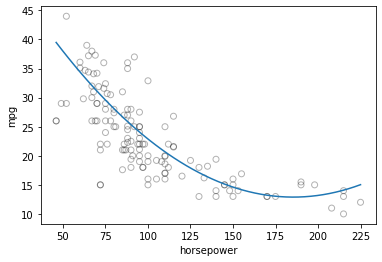

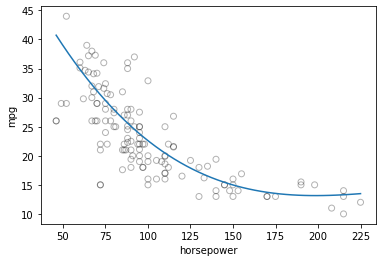

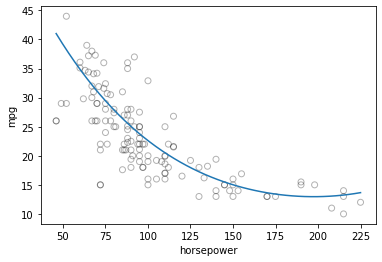

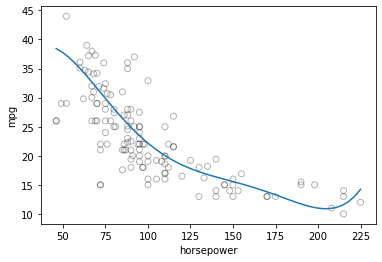

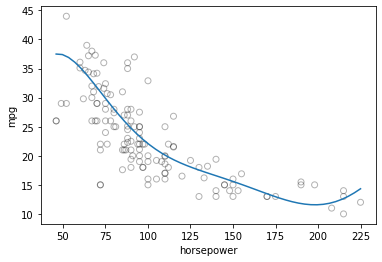

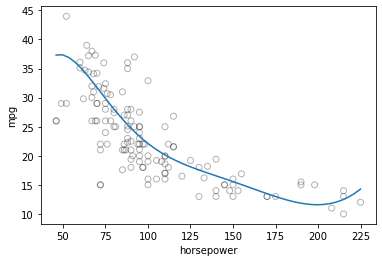

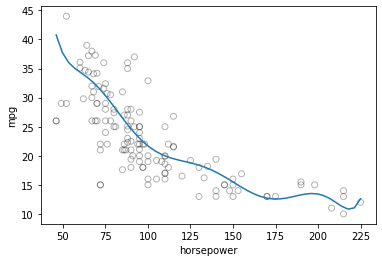

In [253]:
# Generating weights for polynomial function with degree =6
df=df[df['horsepower']!='?']
X=df['horsepower']
Y=df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
error=[]
for i in range(8):
    weights = np.polyfit(X_train, y_train, i+1)
# Generating model with the given weights
    model = np.poly1d(weights)
# Prediction on validation set
    pred = model(X_test)
    error.append(np.mean((pred-y_test)**2))
    xp = np.linspace(X_test.min(), X_test.max())
    pred_plot = model(xp)
    plt.scatter(X_test, y_test, facecolor='None', edgecolor='k', alpha=0.3)
    plt.plot(xp, pred_plot)
    plt.xlabel("horsepower")
    plt.ylabel("mpg")
    plt.show()

Text(0, 0.5, 'error')

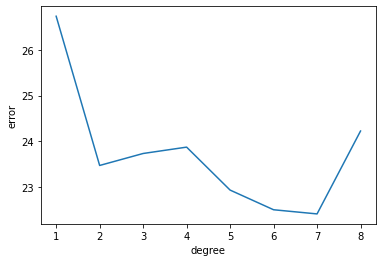

In [254]:
plt.plot(range(1,9), error)
plt.xlabel("degree")
plt.ylabel("error")


In [255]:
min(error)

22.41816589579273

In [301]:
#from sklearn import cross_validation as CV
X = df[['horsepower', 'weight']]
Y=df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
scores=[]
#degrees=range(1,)
for i in range(1,9):
    polynomial_features = PolynomialFeatures(degree=i,
                                             include_bias=False)
    linear_regression = lr()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X_train, y_train)
    pred=pipeline.predict(X_test)
    scores.append(np.mean((pred-y_test)**2))
    
  

Text(0, 0.5, 'score')

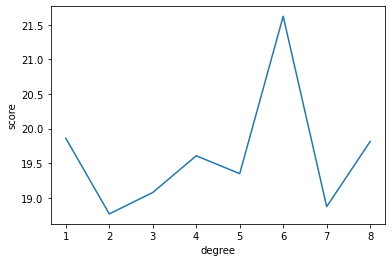

In [294]:
plt.plot(range(1,9), scores)
plt.xlabel("degree")
plt.ylabel("score")

In [298]:
min(scores)

18.76860965404827